# Exercise 01 : Line chart with styles

In [19]:
import pandas as pd
import sqlite3

In [20]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

## create exactly the same graph as below (both values and style):
- analyze only the users and not the admins
- analyze only the dates when there were both views and checker commits
- use size of the font should be 8
- the size of the figure is (15,8)

In [21]:
commit_df = pd.io.sql.read_sql("SELECT DATE(timestamp) as date, COUNT(DATE(timestamp)) as commits FROM checker WHERE uid LIKE 'user_%' GROUP BY date(timestamp)", connection)
commit_df.head()

,date,commits
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25


In [22]:
views_df = pd.io.sql.read_sql("SELECT DATE(datetime) as date, COUNT(DATE(datetime)) as views FROM pageviews WHERE uid LIKE 'user_%' GROUP BY date(datetime)", connection)
views_df.head()

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


In [23]:
result = pd.merge(commit_df, views_df, on='date')
result['date'] = pd.to_datetime(result['date']) 
result.tail()

,date,commits,views
27,2020-05-17,48,9
28,2020-05-18,3,51
29,2020-05-19,34,11
30,2020-05-20,28,12
31,2020-05-21,49,11


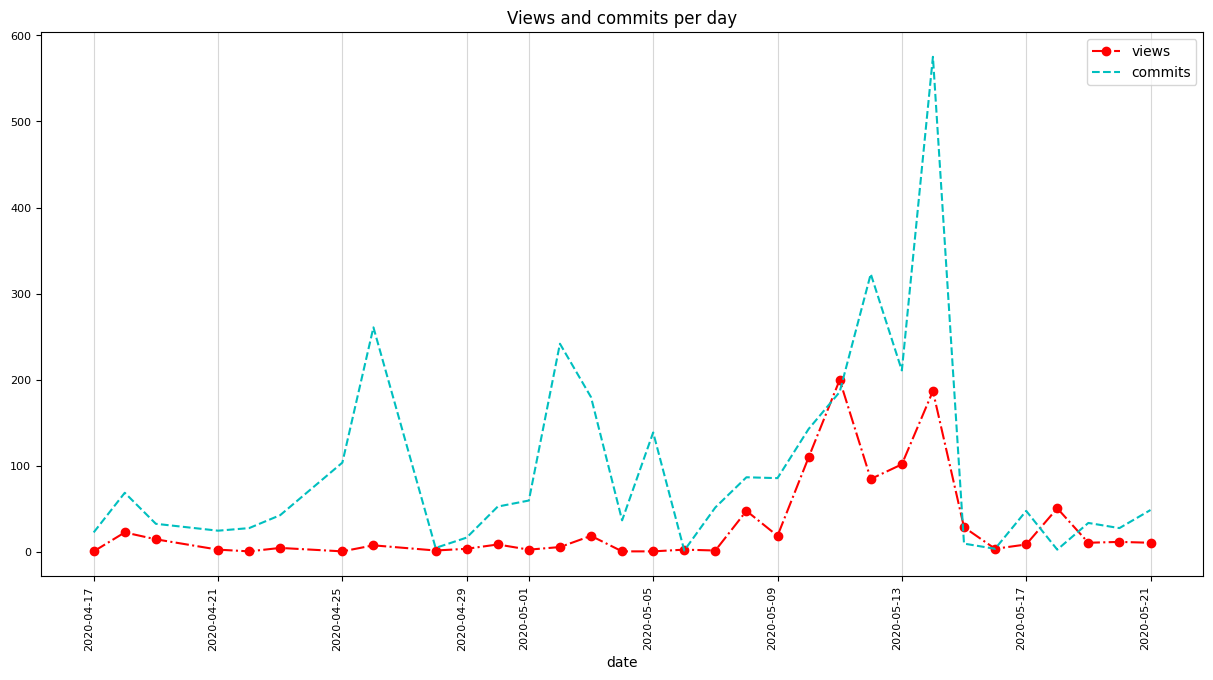

In [24]:
result.plot(x='date', 
        y=['views', 'commits'], 
        kind='line', 
        style = ['r-.o', 'c--'],
        title='Views and commits per day',
        figsize=(15, 8),
        fontsize=8,
        rot=90
).grid(axis='x', which='major', linestyle='solid', alpha=0.5)

## How many times was the number of views larger than 150?

In [28]:
count = (result['views'] > 150).sum()
count

2

## The answer is 2.

In [ ]:
connection.close()